In [2]:
# version necesaria de numpy 2.2.4 para modelo bayesiano, instalar y reiniciar kermel
pip install numpy==2.2.4

SyntaxError: invalid syntax (1623008594.py, line 2)

In [1]:
import numpy as np
print(np.__version__)

2.2.4


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [3]:
# Cargar los datos desde el archivo CSV
file_path = "../data/raw/Tablas_Unidas.csv"
df = pd.read_csv(file_path, sep=',')

# Convertir la columna ID_Date a formato de fecha (YYYY-MM-DD)
df['ID_Date'] = pd.to_datetime(df['ID_Date'], format='%Y%m').dt.strftime('%Y-%m-%d')

df.set_index('ID_Date', inplace=True)

# Columnas a limpiar (ejemplo)
columnas_numericas = ['CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'RADIO', 'REVISTAS', 
                      'PlataformasVideo', 'VARIOS', 'Sales', 'Ticket_medio', 'INV_Total', "PRODUCCION"]

for col in columnas_numericas:
    if df[col].dtype == object:  # Si es texto (por las comas)
        df[col] = df[col].str.replace(',', '.').astype(float)  # Convertir a float


# Mostrar el DataFrame
df.head(5)

,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
ID_Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,4838,33222,94248,1415,65373,25,167199,63649,39808,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
2022-02-01,352581,5823,38570,109531,546,77209,26,176733,124861,45543,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2022-03-01,332955,4845,33956,97805,5444,83178,341,173514,104132,43583,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
2022-04-01,282169,3711,45949,90689,1184,69335,162,162805,74044,39650,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
2022-05-01,261829,9037,48685,92069,8648,70972,210,156011,44196,40472,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


In [6]:
# Lista de columnas relevantes
# Estas son las columnas que nos vamos a quedar:
# - La columna de fecha (ID_Date)
# - Las columnas de cómo accede la gente a la página web (SocialNetworks, DirectTraffic, EMail, NaturalSearch, OnlineMedia, OtherReferrer, PaidSearch)
# - Las columnas de inversión (CINE, EXTERIOR, INTERNET, PRENSA, PRODUCCION, RADIO, REVISTAS, PlataformasVideo, VARIOS, INV_Total)
# - Las columnas relacionadas con fechas (Dias_mes, Dia_inicio_mes, Dia_findemes, working_days, Dias_fines_semana, Easterweek)
cols_to_keep = [
     "Unique_visitors", "Visit_Store", "Sales", "SocialNetworks", "DirectTraffic", "EMail",
    "NaturalSearch", "OnlineMedia", "OtherReferrer", "PaidSearch", "CINE", "EXTERIOR", "INTERNET", "PRENSA", "PRODUCCION", "RADIO",
    "REVISTAS", "PlataformasVideo", "VARIOS", "INV_Total", "Dias_mes", "Dia_inicio_mes", "Dia_findemes", "working_days",
    "Dias_fines_semana", "Easterweek"
]

# Filtrado total
filtered_df = df[cols_to_keep]

# Mostrar todas las columnas completas (sin "...")
pd.set_option('display.max_columns', None)


filtered_df.head()

,Unique_visitors,Visit_Store,Sales,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek
ID_Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382,5516,1299,1415,65373,25,167199,63649,39808,13798,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14,31,5,7,21,10,0
2022-02-01,352581,6769,1752,546,77209,26,176733,124861,45543,28656,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08,28,1,7,20,8,0
2022-03-01,332955,6249,1897,5444,83178,341,173514,104132,43583,15243,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47,31,1,3,23,8,0
2022-04-01,282169,6507,1546,1184,69335,162,162805,74044,39650,18510,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91,30,4,5,22,8,1
2022-05-01,261829,7183,1784,8648,70972,210,156011,44196,40472,20031,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17,31,6,1,21,10,0


C:\Users\josit\AppData\Local\Temp\ipykernel_11092\2186284899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros


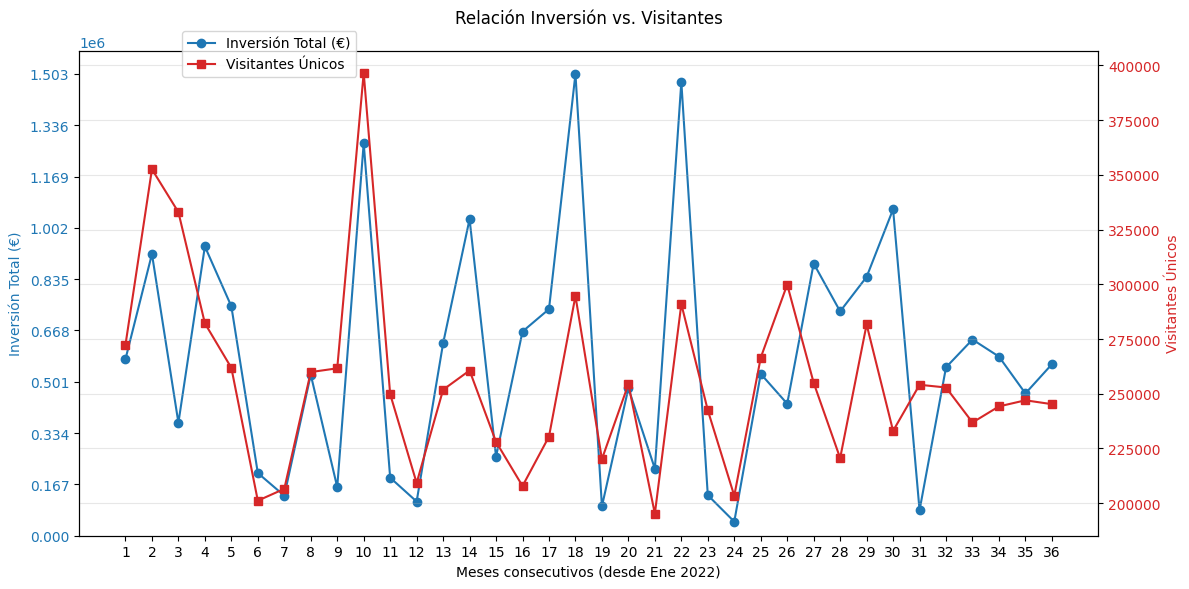

In [7]:
# Preparación de datos
filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros
meses = range(1, len(filtered_df) + 1)  # Índice numérico 1, 2, 3...

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Eje Izquierdo (Inversión Total) ---
ax1.plot(meses, filtered_df['INV_Total'], 
         color='tab:blue', marker='o', label='Inversión Total (€)')

# Configuración del eje Y izquierdo
max_inversion = filtered_df['INV_Total'].max()
ax1.set_ylim(0, max_inversion * 1.05)  # 5% más arriba del máximo
ax1.set_yticks(np.linspace(0, max_inversion, 10))  # 10 divisiones equidistantes
ax1.set_ylabel('Inversión Total (€)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Eje Derecho (Visitantes Únicos) ---
ax2 = ax1.twinx()
ax2.plot(meses, filtered_df['Unique_visitors'], 
         color='tab:red', marker='s', label='Visitantes Únicos')
ax2.set_ylabel('Visitantes Únicos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- Ajustes finales ---
ax1.set_xticks(meses)
ax1.set_xticklabels([f'{i}' for i in meses])
ax1.set_xlabel('Meses consecutivos (desde Ene 2022)')

plt.title('Relación Inversión vs. Visitantes', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

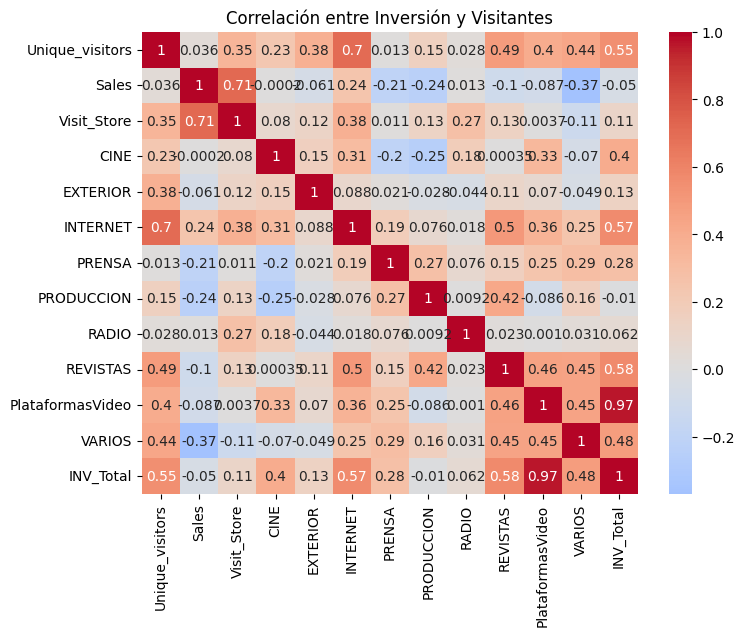

In [8]:
# Calcular matriz de correlación
corr = filtered_df[['Unique_visitors',"Sales", 'Visit_Store', "CINE","EXTERIOR","INTERNET","PRENSA","PRODUCCION","RADIO","REVISTAS","PlataformasVideo","VARIOS","INV_Total"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Inversión y Visitantes')
plt.show()

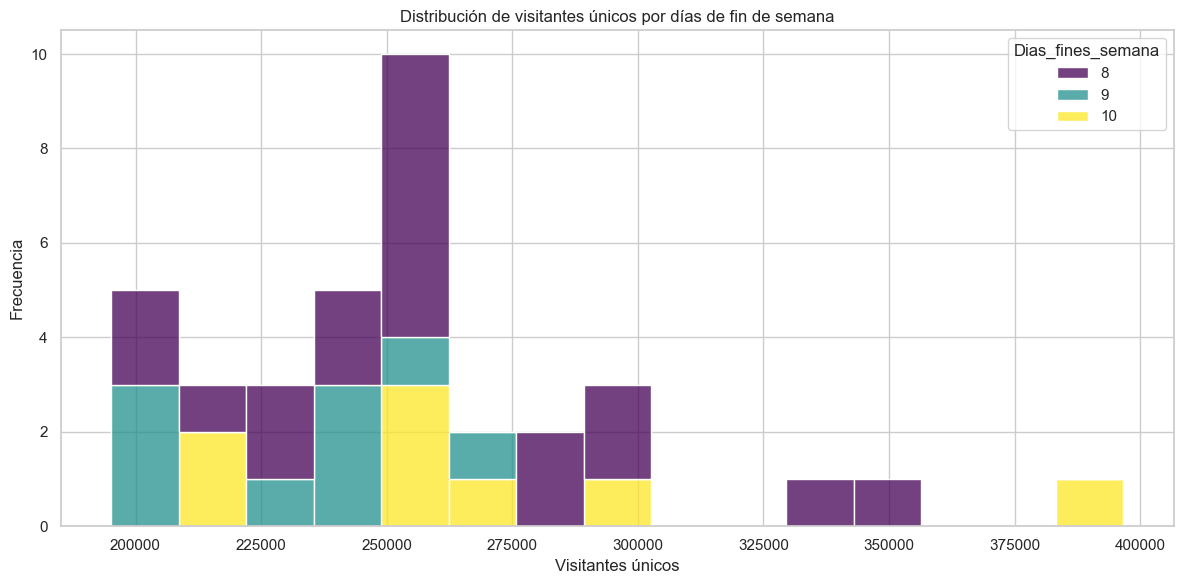

In [9]:
# Estilo
sns.set(style="whitegrid")

# Histograma agrupado por cantidad de días de fin de semana
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Unique_visitors', hue='Dias_fines_semana', bins=15, palette='viridis', multiple='stack')
plt.title('Distribución de visitantes únicos por días de fin de semana')
plt.xlabel('Visitantes únicos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


C:\Users\josit\AppData\Local\Temp\ipykernel_11092\3927406491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')


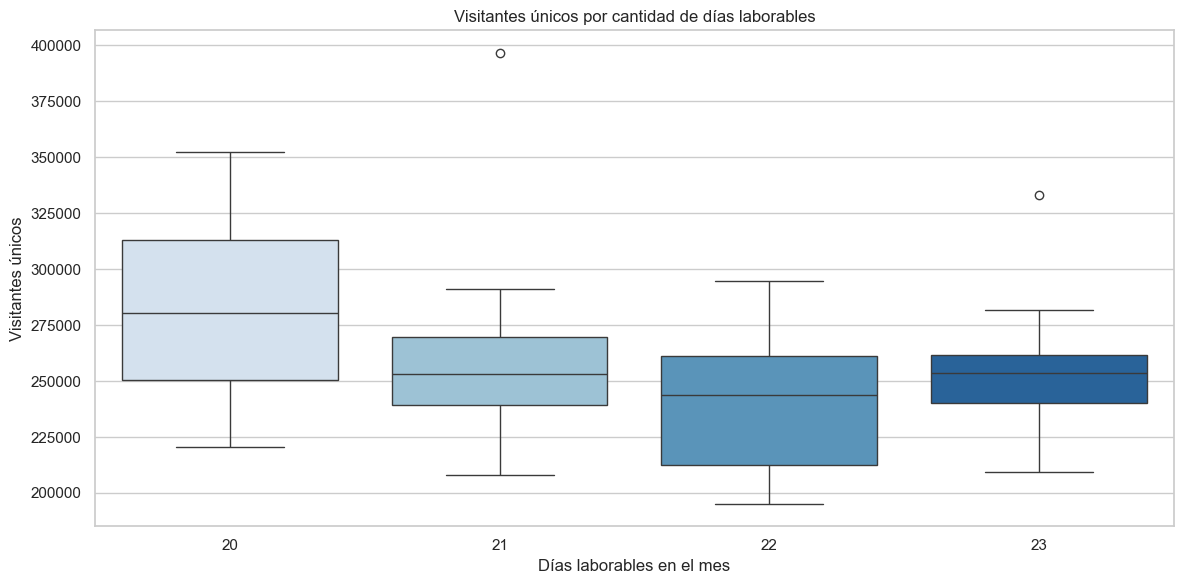

In [10]:
# Estilo
sns.set(style="whitegrid")

# Gráfico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')
plt.title('Visitantes únicos por cantidad de días laborables')
plt.xlabel('Días laborables en el mes')
plt.ylabel('Visitantes únicos')
plt.tight_layout()
plt.show()


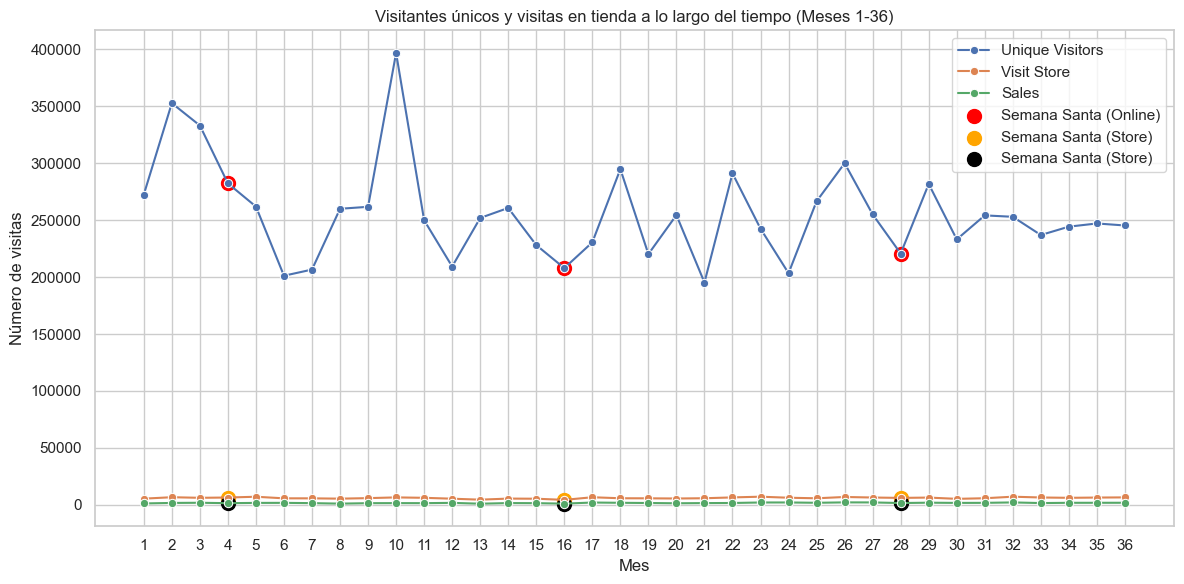

In [11]:
df['Mes_Num'] = range(1, len(df) + 1)

plt.figure(figsize=(12, 6))

# Desactivar errorbar
sns.lineplot(data=df, x='Mes_Num', y='Unique_visitors', marker='o', label='Unique Visitors', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Visit_Store', marker='o', label='Visit Store', errorbar=None)
sns.lineplot(data=df, x='Mes_Num', y='Sales', marker='o', label='Sales', errorbar=None)

# Colorear los puntos si es Semana Santa
easter_df = df[df['Easterweek'] == 1]
plt.scatter(easter_df['Mes_Num'], easter_df['Unique_visitors'], color='red', s=100, label='Semana Santa (Online)')
plt.scatter(easter_df['Mes_Num'], easter_df['Visit_Store'], color='orange', s=100, label='Semana Santa (Store)')
plt.scatter(easter_df['Mes_Num'], easter_df['Sales'], color='black', s=100, label='Semana Santa (Store)')

# Estética
plt.title('Visitantes únicos y visitas en tienda a lo largo del tiempo (Meses 1-36)')
plt.xlabel('Mes')
plt.ylabel('Número de visitas')
plt.legend()
plt.xticks(ticks=range(1, 37))
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Cargar tus datos (ya debes tener el df cargado)
# Supongamos que se llama df

# Variables predictoras (X)
X_cols = filtered_df.drop(columns=['Sales', 'Unique_visitors', 'Visit_Store']).columns.tolist()

X = df[X_cols]

In [13]:
print(X.dtypes)

SocialNetworks         int64
DirectTraffic          int64
EMail                  int64
NaturalSearch          int64
OnlineMedia            int64
OtherReferrer          int64
PaidSearch             int64
CINE                 float64
EXTERIOR             float64
INTERNET             float64
PRENSA               float64
PRODUCCION           float64
RADIO                float64
REVISTAS             float64
PlataformasVideo     float64
VARIOS               float64
INV_Total            float64
Dias_mes               int64
Dia_inicio_mes         int64
Dia_findemes           int64
working_days           int64
Dias_fines_semana      int64
Easterweek             int64
dtype: object


In [14]:

# Variables objetivo (Y)
y_col_online = ['Unique_visitors']
y_col_sales = ['Sales']
y_sales = df[y_col_sales]
y_online = df[y_col_online]


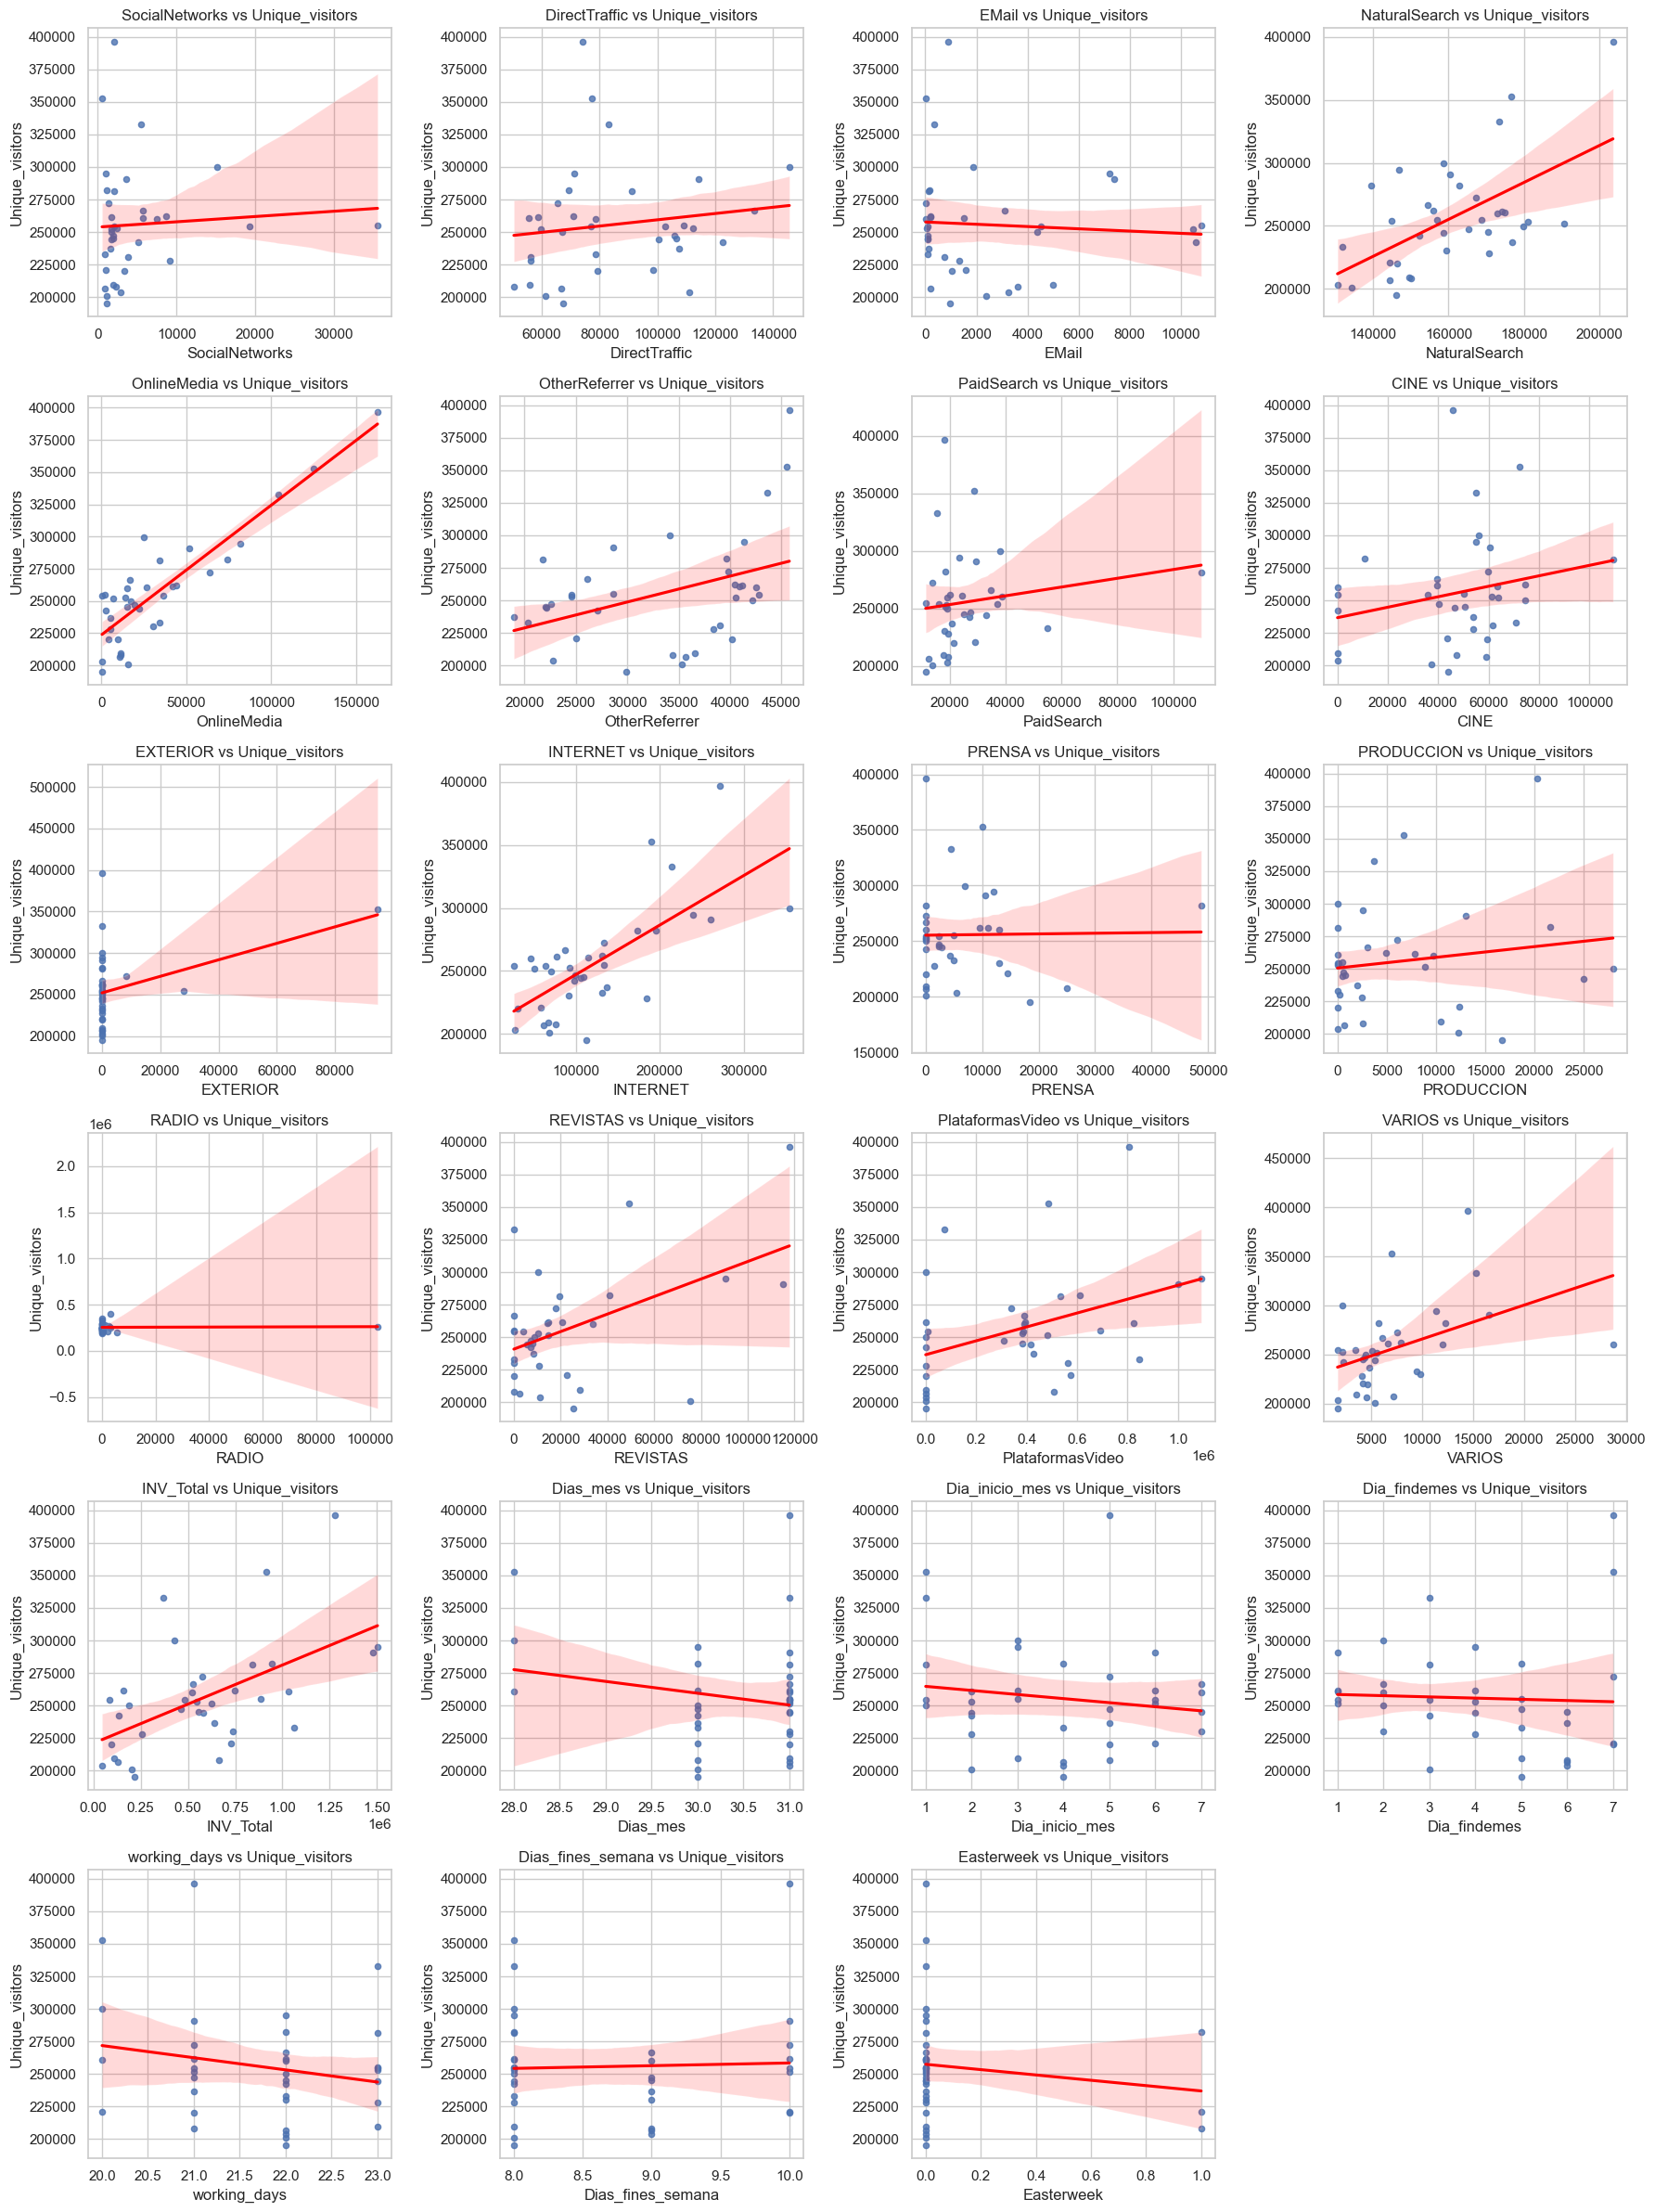

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # Número de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cuántas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Graficar cada variable independiente contra la variable dependiente
for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Unique_visitors', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Unique_visitors')

# Eliminar subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
x_cols_online = ["CINE", "INTERNET", "REVISTAS", "INV_Total", "OnlineMedia", "working_days", 
                 "Dias_fines_semana", "Easterweek", "Mes_Num", "EXTERIOR", "PRENSA", "PRODUCCION", 
                 "RADIO", "PlataformasVideo", "VARIOS",]
X_predict_online = df[x_cols_online]


In [24]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Escalar las variables
scaler = StandardScaler()
X_scaled_onl = scaler.fit_transform(X_predict_online)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_onl, y_online, test_size=0.2, random_state=42)

# Modelo
model = BayesianRidge()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.11413250092477889
MAE: 13165.178293694436


c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


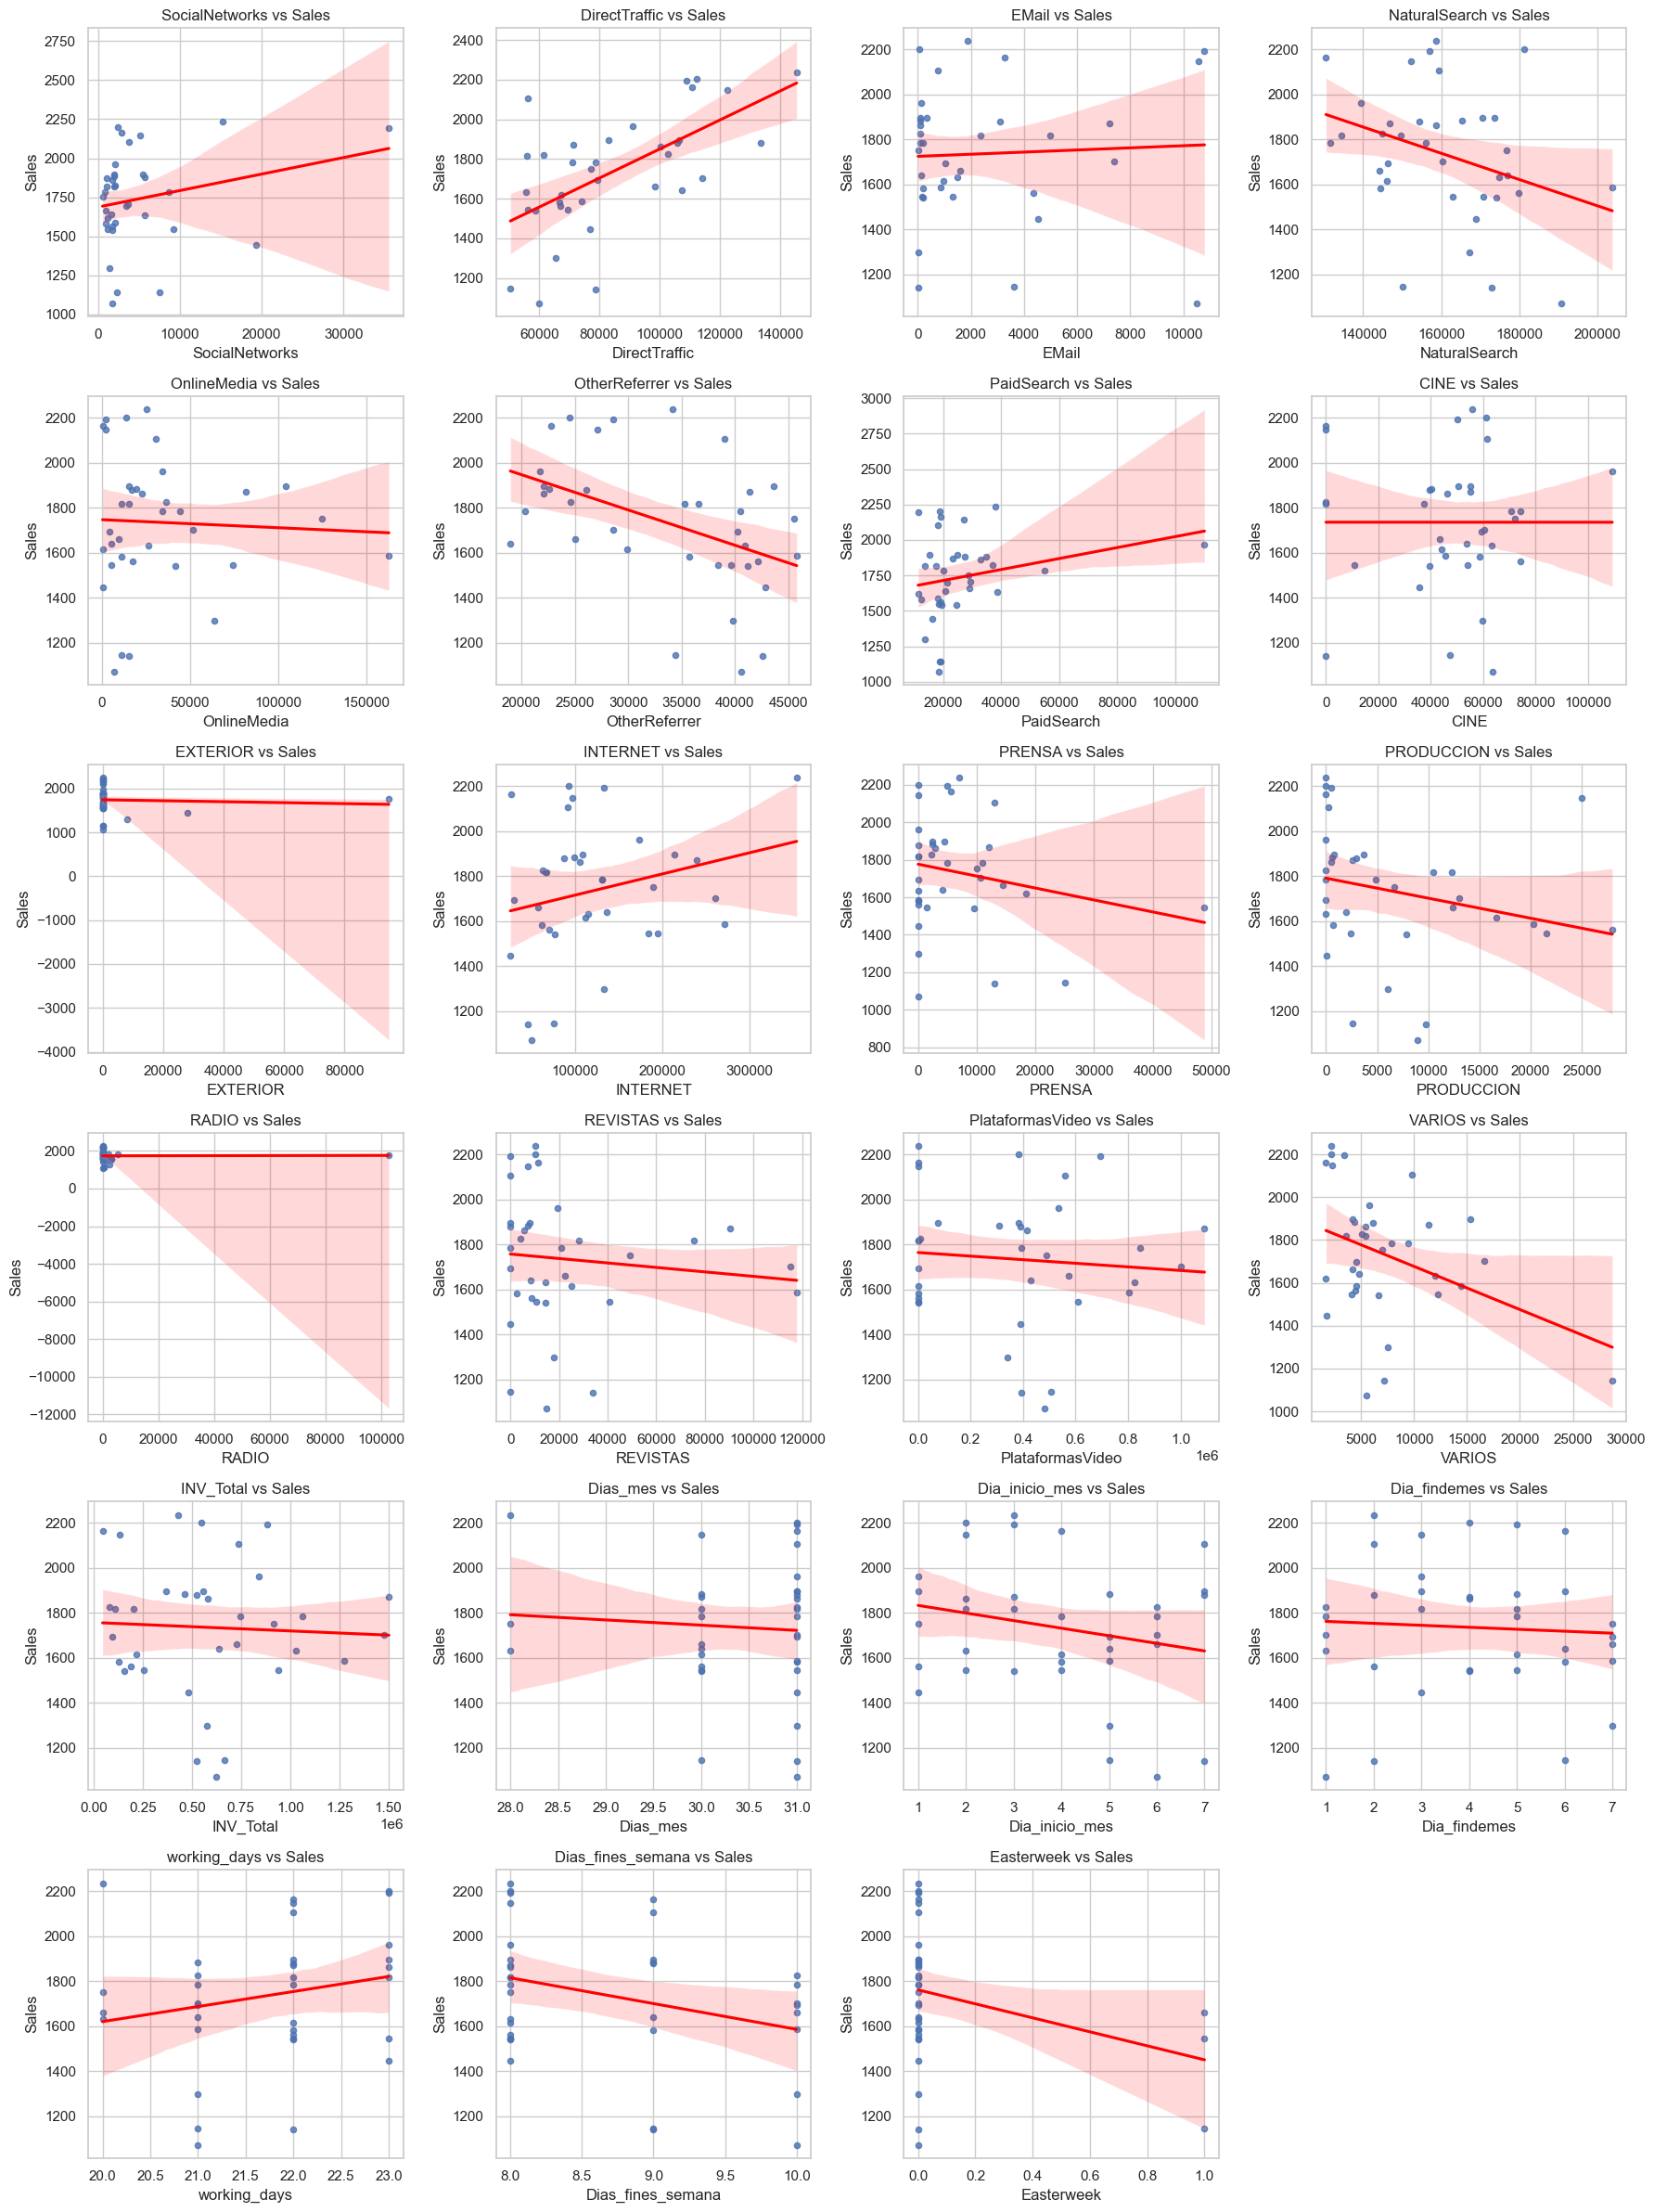

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = X.columns
n_cols = 4  # Número de columnas en la matriz
n_rows = (len(cols) + n_cols - 1) // n_cols  # Calcula cuántas filas se necesitan

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.regplot(data=df, x=col, y='Sales', ax=axes[i], scatter_kws={'s': 20}, line_kws={'color': 'red'})
    axes[i].set_title(f'{col} vs Sales')

# Eliminar subplots vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [19]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sales, test_size=0.2, random_state=42)

# Modelo
model = BayesianRidge()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: -0.28639416689152286
MAE: 316.4933499475462


c:\Users\josit\TERCER CURSO\IA\IA-Casos\env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
import pandas as pd

# Crear copia base
df_1 = filtered_df

# --------- FILTRO PARA UNIQUE_VISITORS ---------
# Calcular la matriz de correlación
corr_unique = df_1.corr(numeric_only=True)['Unique_visitors']

# Eliminar columnas que tienen una baja correlación (en este caso, podrías hacer más estricto el umbral)
# Filtro de correlación ajustado: eliminamos aquellos con correlación en un rango más estricto (-0.1 y 0.1)
cols_to_drop_unique = corr_unique[(corr_unique > -0.15) & (corr_unique < 0.15)].index.tolist()

# Eliminar columnas con alta correlación (mayor que 0.85) entre las variables predictoras
corr_matrix = df_1.corr(numeric_only=True)
high_corr_columns = set()

# Identificar columnas con alta correlación (mayor que 0.85) y agregarlas a la lista
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.65:
            colname = corr_matrix.columns[i]
            high_corr_columns.add(colname)

# Eliminar columnas con alta correlación
cols_to_drop_unique.extend(list(high_corr_columns))

# Filtrar las columnas para el modelo de Unique_visitors
df_unique = df_1.drop(columns=cols_to_drop_unique)

print(f"[Unique_visitors] Columnas eliminadas por baja correlación o alta multicolinealidad: {len(cols_to_drop_unique)}")
print("Columnas eliminadas:", cols_to_drop_unique)
df_unique.head()

[Unique_visitors] Columnas eliminadas por baja correlación o alta multicolinealidad: 16
Columnas eliminadas: ['Sales', 'SocialNetworks', 'DirectTraffic', 'EMail', 'PRENSA', 'RADIO', 'Dia_inicio_mes', 'Dia_findemes', 'Dias_fines_semana', 'Easterweek', 'INV_Total', 'Easterweek', 'INTERNET', 'OnlineMedia', 'Sales', 'Dias_fines_semana']


,Unique_visitors,Visit_Store,NaturalSearch,OtherReferrer,PaidSearch,CINE,EXTERIOR,PRODUCCION,REVISTAS,PlataformasVideo,VARIOS,Dias_mes,working_days
ID_Date,,,,,,,,,,,,,
2022-01-01,272382,5516,167199,39808,13798,59887.84,8200.00,6050.0,18013.50,338824.94,7531.03,31,21
2022-02-01,352581,6769,176733,45543,28656,72291.56,94627.51,6700.0,49110.91,487537.14,6972.02,28,20
2022-03-01,332955,6249,173514,43583,15243,55000.00,0.00,3700.0,0.00,75000.00,15284.85,31,23
2022-04-01,282169,6507,162805,39650,18510,10883.30,0.00,21550.0,40876.00,610865.89,12255.75,30,22
2022-05-01,261829,7183,156011,40472,20031,74333.20,0.00,4900.0,20775.75,393807.74,7926.46,31,21


In [28]:

# --------- FILTRO PARA VISIT_STORE ---------
# Calcular la matriz de correlación para 'Visit_Store'
corr_store = df_1.corr(numeric_only=True)['Sales']

# Filtro de correlación ajustado: eliminamos aquellos con correlación en un rango más estricto (-0.1 y 0.1)
cols_to_drop_store = corr_store[(corr_store > -0.25) & (corr_store < 0.25)].index.tolist()

# Eliminar columnas con alta correlación (mayor que 0.85) entre las variables predictoras
high_corr_columns_store = set()

# Identificar columnas con alta correlación (mayor que 0.85) y agregarlas a la lista
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_columns_store.add(colname)

# Eliminar columnas con alta correlación
cols_to_drop_store.extend(list(high_corr_columns_store))

# Filtrar las columnas para el modelo de Visit_Store
df_store = df_1.drop(columns=cols_to_drop_store)

print(f"\n[Visit_Store] Columnas eliminadas por baja correlación o alta multicolinealidad: {len(cols_to_drop_store)}")
print("Columnas eliminadas:", cols_to_drop_store)
df_store.head()



[Visit_Store] Columnas eliminadas por baja correlación o alta multicolinealidad: 20
Columnas eliminadas: ['Unique_visitors', 'SocialNetworks', 'EMail', 'OnlineMedia', 'PaidSearch', 'CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'PRODUCCION', 'RADIO', 'REVISTAS', 'PlataformasVideo', 'INV_Total', 'Dias_mes', 'Dia_inicio_mes', 'Dia_findemes', 'working_days', 'OnlineMedia', 'INV_Total']


,Visit_Store,Sales,DirectTraffic,NaturalSearch,OtherReferrer,VARIOS,Dias_fines_semana,Easterweek
ID_Date,,,,,,,,
2022-01-01,5516,1299,65373,167199,39808,7531.03,10,0
2022-02-01,6769,1752,77209,176733,45543,6972.02,8,0
2022-03-01,6249,1897,83178,173514,43583,15284.85,8,0
2022-04-01,6507,1546,69335,162805,39650,12255.75,8,1
2022-05-01,7183,1784,70972,156011,40472,7926.46,10,0


In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# --- Validaciones básicas ---
print(f"✔️ Tamaño y_test: {len(y_test_online)}")
print(f"✔️ Tamaño y_pred: {len(y_pred_online)}")

assert len(y_test_online) == len(y_pred_online), "❌ ¡Tamaños diferentes entre y_test y y_pred!"
assert not np.isnan(y_pred_online).any(), "❌ ¡Hay valores NaN en y_pred!"
assert not np.isinf(y_pred_online).any(), "❌ ¡Hay valores infinitos en y_pred!"
assert not np.isnan(y_test_online).any(), "❌ ¡Hay valores NaN en y_test!"
assert not np.isinf(y_test_online).any(), "❌ ¡Hay valores infinitos en y_test!"

# --- Cálculo manual de R² ---
ss_res = np.sum((y_test_online - y_pred_online) ** 2)
ss_tot = np.sum((y_test_online - np.mean(y_test_online)) ** 2)
r2_manual = 1 - (ss_res / ss_tot)

print(f"📐 R² (sklearn): {r2_score(y_test_online, y_pred_online):.4f}")
print(f"🧮 R² (manual): {r2_manual:.4f}")


NameError: name 'y_test_online' is not defined

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
predictors_online = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()
predictors_offline = df_store.drop(columns=[ 'Visit_Store', "Sales"]).columns.tolist()

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Sales']


# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Estandarización de las variables predictoras
scaler_online = StandardScaler()
scaler_offline = StandardScaler()

X_online_scaled = scaler_online.fit_transform(X_online)
X_offline_scaled = scaler_offline.fit_transform(X_offline)

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online_scaled, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline_scaled, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión lineal
model_online = LinearRegression().fit(X_train_online, y_train_online)
model_offline = LinearRegression().fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 Online - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 Offline - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})

print("\nCoeficientes Online:")
print(coef_online_df)

print("\nCoeficientes Offline:")
print(coef_offline_df)


📊 Online - MSE: 1330928108.43, R²: -4.22
🏬 Offline - MSE: 81219.08, R²: 0.34

Coeficientes Online:
               Canal  Impacto en Visitas Online
0      NaturalSearch               26683.825918
1      OtherReferrer               12356.131478
2         PaidSearch               18711.966633
3               CINE               -2809.426338
4           EXTERIOR                2860.465312
5         PRODUCCION               -5070.539069
6           REVISTAS               11600.262103
7   PlataformasVideo                6070.214569
8             VARIOS                2154.755581
9           Dias_mes               -3946.753289
10      working_days               -3312.988846

Coeficientes Offline:
               Canal  Impacto en Visitas Offline
0      DirectTraffic                  179.875435
1      NaturalSearch                  -88.284877
2      OtherReferrer                   49.752109
3             VARIOS                  -50.318524
4  Dias_fines_semana                  -56.453285
5       

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
# predictors_online = ['INTERNET', 'REVISTAS', 'VARIOS', 'PlataformasVideo', 'INV_Total']
predictors_online = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()
predictors_offline = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()

# Variables objetivo
y_online = filtered_df['Unique_visitors']
y_offline = filtered_df['Visit_Store']

# Preparar conjuntos X para cada modelo
X_online = filtered_df[predictors_online]
X_offline = filtered_df[predictors_offline]

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión Ridge (ajustando alpha según sea necesario)
model_online = Ridge(alpha=1.0).fit(X_train_online, y_train_online)  # alpha es el parámetro de regularización
model_offline = Ridge(alpha=1.0).fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas de evaluación
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 **Online** - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 **Offline** - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})

print("\n**Coeficientes para visitas Online:**")
print(coef_online_df)

print("\n**Coeficientes para visitas Offline (tienda):**")
print(coef_offline_df)


📊 **Online** - MSE: 437267163.16, R²: -0.72
🏬 **Offline** - MSE: 625127.71, R²: -0.05

**Coeficientes para visitas Online:**
              Canal  Impacto en Visitas Online
0          EXTERIOR                   0.908258
1          REVISTAS                   0.446581
2  PlataformasVideo                   0.021921
3            VARIOS                   2.572654

**Coeficientes para visitas Offline (tienda):**
              Canal  Impacto en Visitas Offline
0          EXTERIOR                    0.004386
1          REVISTAS                    0.005154
2  PlataformasVideo                   -0.000218
3            VARIOS                   -0.018640


In [ ]:
print("Impacto en Visitas Offline:")
coef_offline_df

Impacto en Visitas Offline:


,Canal,Impacto en Visitas Offline
0,EXTERIOR,0.004386
1,REVISTAS,0.005154
2,PlataformasVideo,-0.000218
3,VARIOS,-0.018640


In [ ]:
print("Impacto en Visitas Online:")
coef_online_df

Impacto en Visitas Online:


,Canal,Impacto en Visitas Online
0,EXTERIOR,0.908258
1,REVISTAS,0.446581
2,PlataformasVideo,0.021921
3,VARIOS,2.572654


In [ ]:
import matplotlib.pyplot as plt

resultados.plot.barh(x='Canal', y='Impacto_en_Ventas', 
                    title='Impacto de cada canal en ventas (Regresión Lineal)')
plt.xlabel('Incremento en visitas por € invertido')
plt.show()

NameError: name 'resultados' is not defined